# Imshow

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

First we focus on creating the data. An ising model is used to make this data.

In [2]:
# Define LxL matrix
L = 55
# Initialize as random spin
M = 2*(np.random.rand(L,L)>.5)-1
J = 1
b = 2.5

nPer = 100

images = [M]
for i in range(100):
    M = M.copy()
    for dm in range(nPer):
        jj = int(np.random.rand()*L - 1)
        kk = int(np.random.rand()*L - 1)
        dE = 2*J*(M[jj+1,kk] + M[jj-1,kk] + M[jj,kk+1] + M[jj,kk-1])*M[jj,kk]
        if dE <= 0:
            M[jj,kk]*=-1
        else:
            if(np.random.rand()<np.exp(-b*dE)):
                M[jj,kk]*=-1
    images.append(M)
    M[:,-1] = M[:,0]
    M[-1,:] = M[0,:]

Now we plot it.

<IPython.core.display.Javascript object>


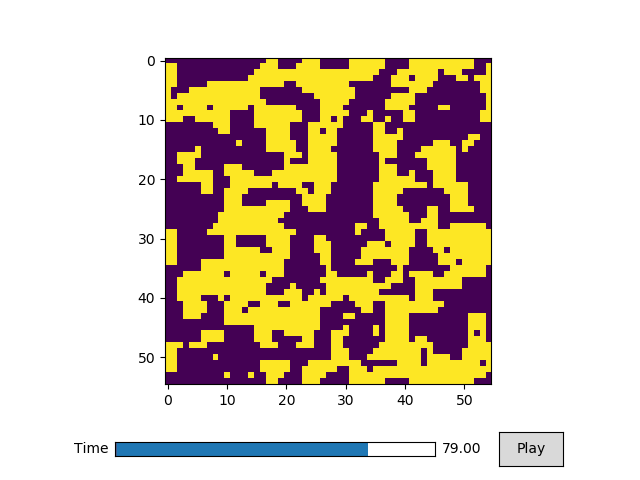

In [3]:
block = amp.blocks.Imshow(images)
anim = amp.Animation([block])

anim.controls()
anim.save_gif('ising')
plt.show()